Dolaczenie modulow wykorzystywanych na potrzeby laboratorium:

In [1]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
import numpy as np
import matplotlib.pyplot as plt
import glob, os

Ponizej zawarto definicje funkcji, ktore mozna wykorzystac do realizacji zadan laboratoryjnych oraz ich przyklady wywolania:

In [2]:
def read_img(filename, size):
    img = load_img(filename, target_size=size)
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

# Example: img = read_img("img.jpg", (299, 299)) - wczytanie pliku img.jpg znajdujacego sie w tym samym folderze co notebook, 
# wynikowy rozmiar obrazu to 299x299 (i trzy kanaly - kodowanie rgb)

def create_dataset(main_folder_path, size):
    X = []
    y = []

    os.chdir(".")
    for file in glob.glob(main_folder_path + "/*/*.jp*"):
        X.append(read_img(file, size))
        y.append(file.split('\\')[1])
    X = np.asarray(X)
    y = np.asarray(y).astype('float32')
    return X, y

# Example: X, y = create_dataset("faces", (299, 299)) - wczytanie zbioru z folderu faces, w folderze znajduja sie dwa pofoldery - o nazwach 0 i 1, 
# a w nich zdjecia w formacie jpeg lub jpg, wynikowy rozmiar obrazów to 299x299 (i trzy kanaly - kodowanie rgb)

def plot_images(X, y, rows=2, cols=5, clustering=False, nntesting=False, y_pred=None):
    # rows - number of classes - 2
    # cols - number of instances in one class - 5 images per class
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 7))
    counter = 0
    for row in range(rows):
        for col in range(cols):
            ax[row][col].imshow(X[counter] * 0.5 + 0.5)
            if not clustering and not nntesting:
                ax[row][col].set_title(f"label:{y[counter]}")
            else:
                if clustering:
                    ax[row][col].set_title(f"cluster number:{y[counter]}")
                else:
                    ax[row][col].set_title(f"true:{y[counter]} predicted:{y_pred[counter]}")
            counter += 1
    plt.show()

# Example: 
# plot_images(X, y) - wyswietlenie zbioru treningowego/do grupowania z 10 elementami (5 na klase)
# plot_images(X_test, y_test, rows=2, cols=2) - wyswietlenie zbioru testowego z 4 elementami (2 na klase)
# plot_images(X, kmeans_prediction, clustering=True) - wywolanie do wyswietlenia wynikow grupowania
# plot_images(X_test, y_test, rows=2, cols=2, clustering=False, nntesting=True, y_pred=nn_pred.reshape(nn_pred.shape[0])) - wyswietlenie wynikow klasyfikacji dla zbioru testowego
# plot_images(X, y, clustering=False, nntesting=True, y_pred=nn_pred.reshape(nn_pred.shape[0])) - wyswietlenie wynikow klasyfikacji dla zbioru treningowego

Do zmiennych X, y oraz X_test, y_test nalezy wczytac obrazy ze stworzonych folderow. W X i X_test przechowywane są tabele reprezentujace obrazy, a w y i y_test - labele.

In [3]:
X, y = create_dataset("faces", (299, 299))
X_test, y_test = create_dataset("test", (299, 299))

Po wczytaniu tablice powinny miec nastepujace wymiary:

In [4]:
print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X shape: (10, 299, 299, 3), y shape: (10,)
X_test shape: (4, 299, 299, 3), y_test shape: (4,)


Nastepnie nalezy wyswietlic obrazy w zbiorach:

Train:


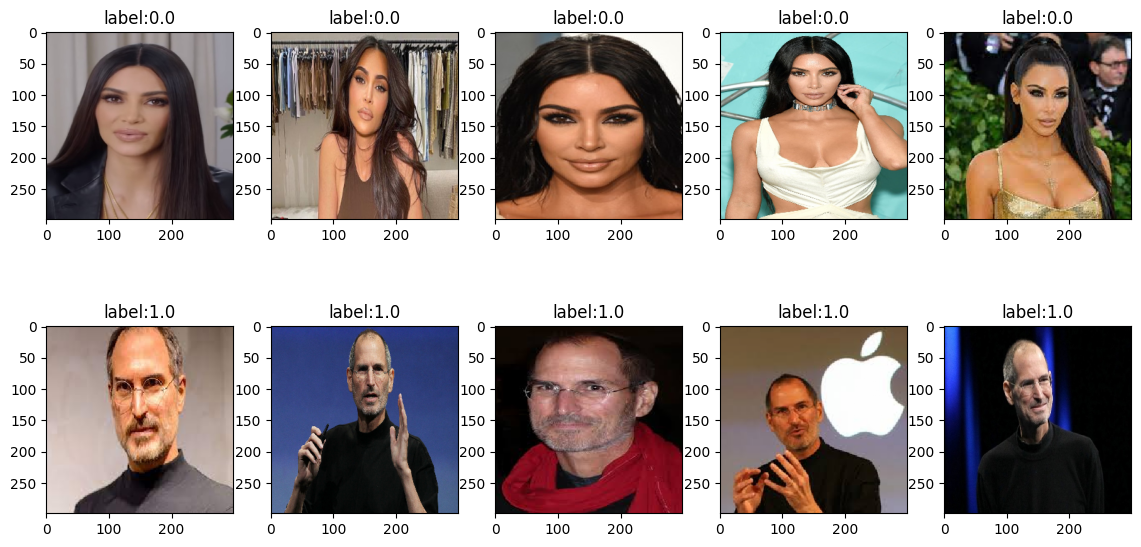

Test:


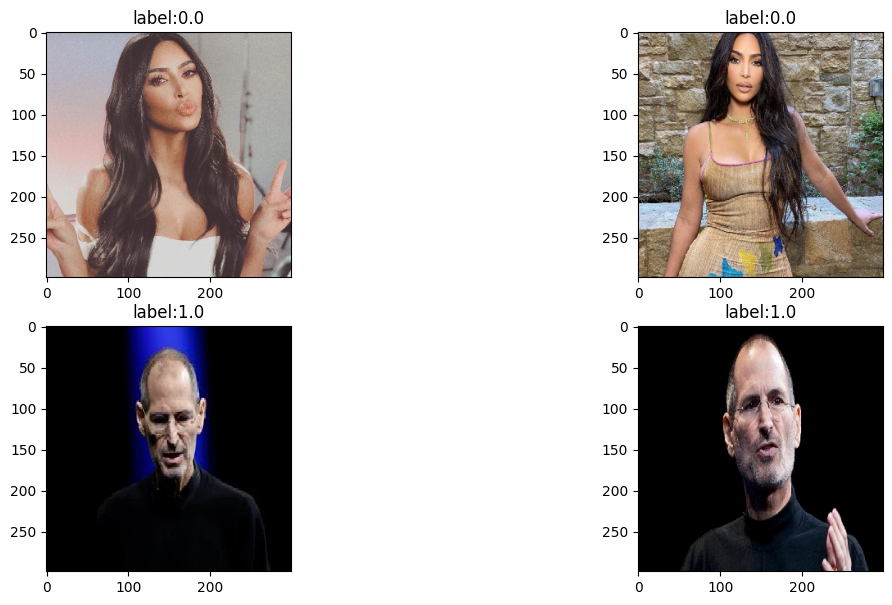

In [5]:
print("Train:")
plot_images(X, y)
print("Test:")
plot_images(X_test, y_test, rows=2, cols=2)

## **Grupowanie**

Wczytanie modelu (bedzie traktowany dalej jako model bazowy) i wyswietlenie jego podsumowania. Prosze skorzystac z modeli Xception lub InceptionV3.

In [6]:
from keras import Model
# Wczytanie wybranego modelu - przyklad - model Xception
model = Xception()

model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 149, 149, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 149, 149, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 149, 149, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 147, 147, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 147, 147, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 147, 147, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 147, 147, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 147, 147, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 147, 147, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 74, 74, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 74, 74, 128)       │               

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

Funkcja summary nie wyswietla jednak nazw warstw, a jedynie typy. W celu wyswietlenia nazw, za pomoca ktorych mozna dostac sie do konkretnych warstw nalezy zapisac je do listy i wyswietlic:

In [7]:
# zapisanie do listy nazw warstw
model_layers = [layer.name for layer in model.layers]
print(model_layers)

['input_layer', 'block1_conv1', 'block1_conv1_bn', 'block1_conv1_act', 'block1_conv2', 'block1_conv2_bn', 'block1_conv2_act', 'block2_sepconv1', 'block2_sepconv1_bn', 'block2_sepconv2_act', 'block2_sepconv2', 'block2_sepconv2_bn', 'conv2d', 'block2_pool', 'batch_normalization', 'add', 'block3_sepconv1_act', 'block3_sepconv1', 'block3_sepconv1_bn', 'block3_sepconv2_act', 'block3_sepconv2', 'block3_sepconv2_bn', 'conv2d_1', 'block3_pool', 'batch_normalization_1', 'add_1', 'block4_sepconv1_act', 'block4_sepconv1', 'block4_sepconv1_bn', 'block4_sepconv2_act', 'block4_sepconv2', 'block4_sepconv2_bn', 'conv2d_2', 'block4_pool', 'batch_normalization_2', 'add_2', 'block5_sepconv1_act', 'block5_sepconv1', 'block5_sepconv1_bn', 'block5_sepconv2_act', 'block5_sepconv2', 'block5_sepconv2_bn', 'block5_sepconv3_act', 'block5_sepconv3', 'block5_sepconv3_bn', 'add_3', 'block6_sepconv1_act', 'block6_sepconv1', 'block6_sepconv1_bn', 'block6_sepconv2_act', 'block6_sepconv2', 'block6_sepconv2_bn', 'block6

Wykorzystaj wyzej wczytany model podstawowy (np. Xception) i zbuduj model do ekstrakcji cech. Wykorzystaj parametr modelu input oraz funkcje get_layer (nazwe warstwy wybierz z listy warstw powyzej - ma to byc warstwa przed klasyfikatorem - splaszczajaca dane, np. average pooling) wraz z parametrem output. Wykorzystaj te dwie czesci i zbuduj model z pomoca funkcji Model. Model nazwac model_embeddings.

Hint:

https://keras.io/getting_started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer-feature-extraction

In [8]:
from tensorflow.keras.models import Model

layer_name = 'avg_pool' 
model_embeddings = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
model_embeddings.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1 (Conv2D)         │ (None, 149, 149, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_bn               │ (None, 149, 149, 32)      │             128 │ block1_conv1[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv1_act (Activation) │ (None, 149, 149, 32)      │               0 │ block1_conv1_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2 (Conv2D)         │ (None, 147, 147, 64)      │          18,432 │ block1_conv1_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_bn               │ (None, 147, 147, 64)      │             256 │ block1_conv2[0][0]         │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1_conv2_act (Activation) │ (None, 147, 147, 64)      │               0 │ block1_conv2_bn[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1               │ (None, 147, 147, 128)     │           8,768 │ block1_conv2_act[0][0]     │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv1_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv1[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_act           │ (None, 147, 147, 128)     │               0 │ block2_sepconv1_bn[0][0]   │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2               │ (None, 147, 147, 128)     │          17,536 │ block2_sepconv2_act[0][0]  │
│ (SeparableConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_sepconv2_bn            │ (None, 147, 147, 128)     │             512 │ block2_sepconv2[0][0]      │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 74, 74, 128)       │           8,192 │ block1_conv2_act[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block2_pool (MaxPooling2D)    │ (None, 74, 74, 128)       │               

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 20,806,952 (79.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

Wygenerowanie cech (ekstrakcja cech) za pomoca stworzonego modelu:

In [9]:
pred_intermediate = model_embeddings.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step


Dokonaj predykcji (funkcja predict modelu) i wykorzystaj funkcje decode_predictions z keras.applications.imagenet_utils do zdekodowania 5 najbardziej prawdobodobych predykcji zwroconych przez model i wypisz je (dla wszystkich obrazkow w zbiorze).

In [10]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

# Predykcja na oryginalnym modelu (nie embeddings)
preds = model.predict(X)
# Dekodowanie wyników (Top 5)
results = decode_predictions(preds, top=5)

for i, res in enumerate(results):
    print(f"Image {i}: {res}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 843ms/step
Image 0: [('n04584207', 'wig', 0.32627264), ('n04350905', 'suit', 0.18751258), ('n02837789', 'bikini', 0.016462462), ('n02669723', 'academic_gown', 0.013107909), ('n03710637', 'maillot', 0.012213335)]
Image 1: [('n03710637', 'maillot', 0.36431918), ('n03770439', 'miniskirt', 0.15654862), ('n03710721', 'maillot', 0.15394212), ('n02892767', 'brassiere', 0.086462036), ('n02837789', 'bikini', 0.054340214)]
Image 2: [('n02892767', 'brassiere', 0.6070468), ('n02837789', 'bikini', 0.12787375), ('n03710637', 'maillot', 0.06355188), ('n04584207', 'wig', 0.052622996), ('n03710721', 'maillot', 0.02356461)]
Image 3: [('n03710637', 'maillot', 0.46839136), ('n03710721', 'maillot', 0.14872073), ('n02837789', 'bikini', 0.07819387), ('n02892767', 'brassiere', 0.036456984), ('n03450230', 'gown', 0.025686357)]
Image 4: [('n03450230', 'gown', 0.5325987), ('n03710637', 'maillot', 0.12565595), ('n03866082', 'overskirt', 0.07736947), ('n02892767', 'brassiere', 0.0635457

Zmiana ksztaltu tablicy z labelami (aby mozliwy byl zapis do DataFrame):

In [11]:
y_reshaped = y.reshape(y.shape[0], 1)
print(f"Shape of y_reshaped: {y_reshaped.shape}")

Shape of y_reshaped: (10, 1)


Z wykorzystaniem struktury DataFrame z bibioteki pandas cechy z sieci konwolucyjnej (embeddings/bottlneck features) sa zapisywane wraz z labelem do tablicy - df:

In [12]:
import pandas as pd
features = [f"feature_{i}" for i in range(0, pred_intermediate.shape[-1])]
features.append("label")
df_values = np.concatenate((pred_intermediate, y_reshaped), axis=-1)
df = pd.DataFrame(df_values, columns=features)

Wyswietlenie zawartosci df:

In [13]:
df

feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.282840   0.105600   0.015839   0.028487   0.192406   0.071195   
1   0.255374   0.110949   0.118138   0.057295   0.005696   0.089936   
2   0.010760   0.005361   0.005421   0.001266   0.018202   0.102930   
3   0.044550   0.218200   0.047734   0.045216   0.197205   0.124761   
4   0.173757   0.006812   0.026190   0.081386   0.179197   0.358305   
5   0.000000   0.155875   1.120578   0.262714   0.000130   0.000672   
6   0.000000   0.618340   1.007653   0.000315   0.013679   0.164745   
7   0.016202   0.207688   0.636459   0.000847   0.007187   0.000000   
8   0.114446   0.357277   0.430083   0.332639   0.045892   0.000000   
9   0.000000   0.078169   0.327007   0.416582   0.158560   0.158611   

   feature_6  feature_7  feature_8  feature_9  ...  feature_2039  \
0   0.000000   0.020699   0.042963   0.002008  ...      0.079358   
1   0.118024   0.188699   0.275284   0.182948  ...      0.032088   
2   0.121917   0.150551   0.222703   0.048166  ...      0.025558   
3   0.102297   0.167232   0.271009   0.074170  ...      0.069310   
4   0.053012   0.364036   0.568802   0.000000  ...      0.005030   
5   0.000000   0.028506   0.235818   0.003934  ...      0.006603   
6   0.455835   0.000000   0.518821   0.001595  ...      0.000000   
7   0.003671   0.426167   0.137722   0.000000  ...      0.146923   
8   0.380079   0.631481   0.354215   0.342776  ...      0.023504   
9   0.178639   0.067031   0.008269   0.049262  ...      0.000000   

   feature_2040  feature_2041  feature_2042  feature_2043  feature_2044  \
0      0.108848      0.005714      0.333210      0.000073      0.173580   
1      0.002879      0.152550      0.592069      0.248466      0.005032   
2      0.000107      0.069744      0.398303      0.069484      0.078644   
3      0.045537      0.267455      0.194278      0.088391      0.037492   
4      0.007320      0.101951      0.520128      0.000000      0.015852   
5      0.029978      0.060797      0.125388      0.000000      0.082141   
6      0.000445      0.281670      0.545814      0.203821      0.002749   
7      0.000000      0.000000      0.000000      0.000000      0.022422   
8      0.429590      0.020552      0.691968      0.025772      0.121691   
9      0.179730      0.000000      0.184499      0.000000      0.115370   

   feature_2045  feature_2046  feature_2047  label  
0      0.042430      0.072169      0.040969    0.0  
1      0.018482      0.026698      0.077585    0.0  
2      0.016496      0.001378      0.000000    0.0  
3      0.000634      0.042054      0.123386    0.0  
4      0.001222      0.051732      0.029500    0.0  
5      0.000000      0.000000      0.000000    1.0  
6      0.000000      0.004844      0.000000    1.0  
7      0.011883      0.005247      0.000000    1.0  
8      0.000000      0.044704      0.324355    1.0  
9      0.019982      0.009662      0.000000    1.0  

[10 rows x 2049 columns]

Zapis do pliku csv:

In [14]:
df.to_csv("dataset_faces.csv", index=False)

Wykorzystac algorytm kmeans (KMeans z modulu cluster biblioteki sklearn), dopasowac go do danych przechowywanych w pred_intermediate, dokonac predykcji i jej wyniki zapisac do zmiennej kmeans_prediction. 

Hint:

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [15]:
from sklearn.cluster import KMeans

# Ustawiamy 2 klastry, bo mamy 2 klasy obiektów
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_prediction = kmeans.fit_predict(pred_intermediate)

print(kmeans_prediction)

[0 0 0 0 0 1 1 1 1 1]


Wyswietlic wyniki grupowania wraz z obrazami:

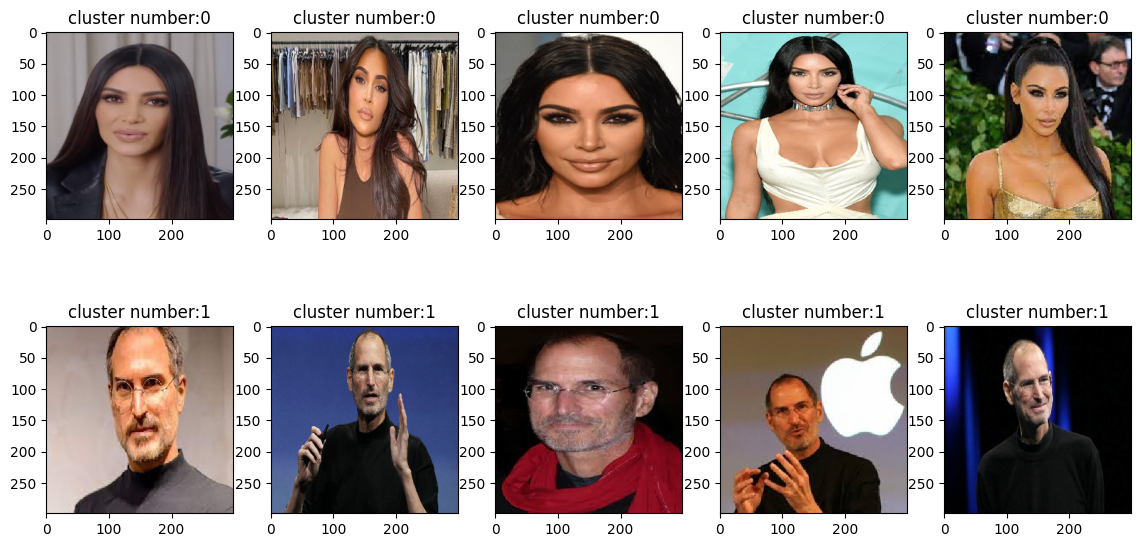

In [16]:
plot_images(X, kmeans_prediction, clustering=True)

Wyswietl workflow i rezultaty uzyskane w programie Orange:

Orange workflow


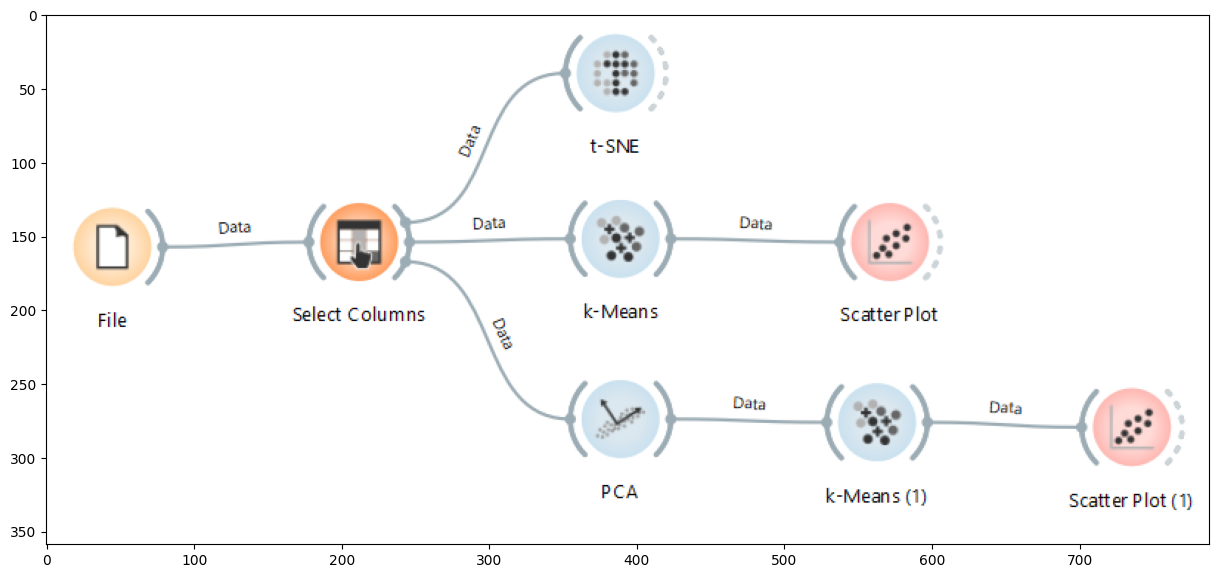

t-SNE results:


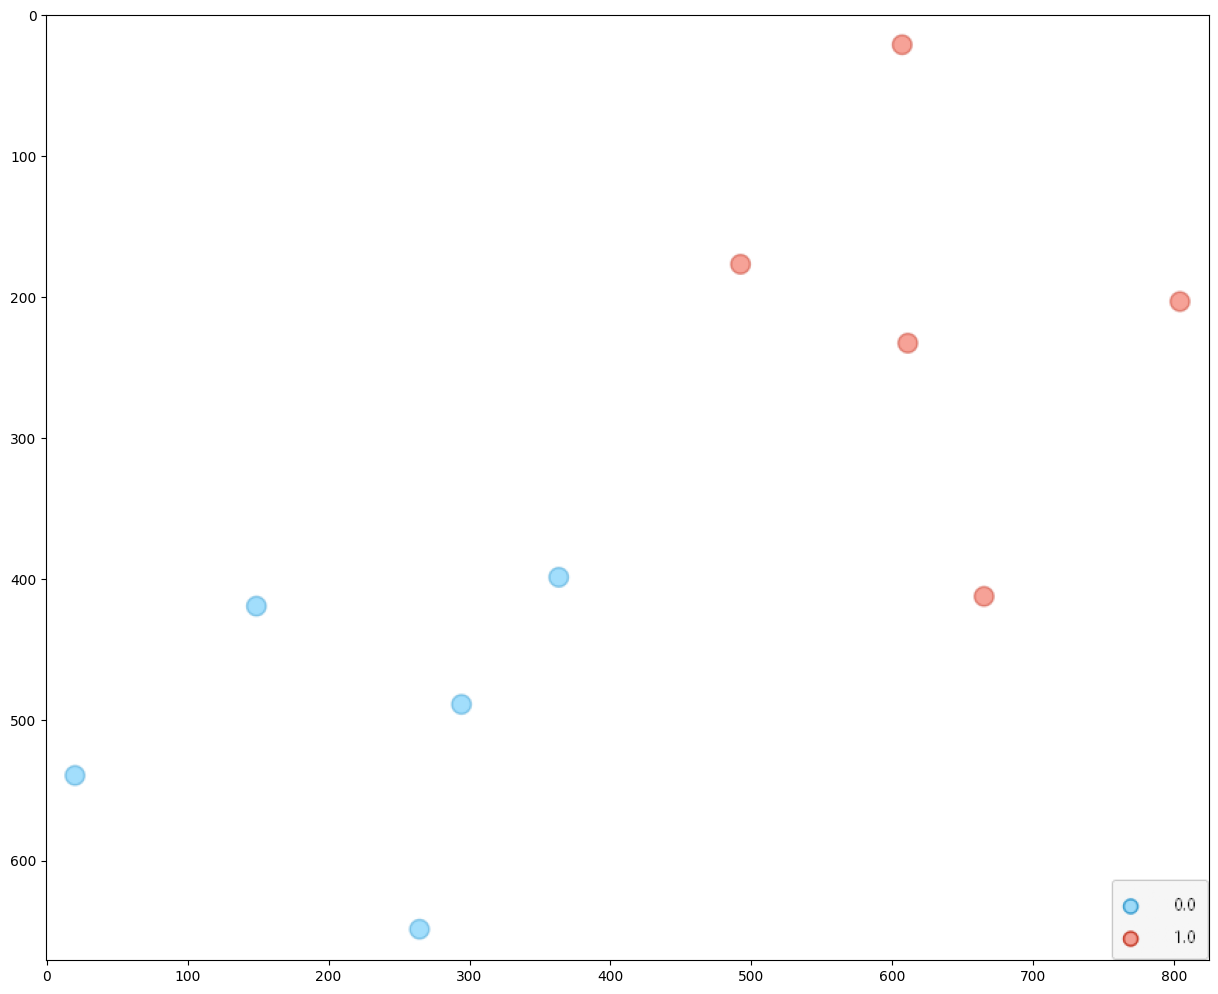

Raw kmenas results:


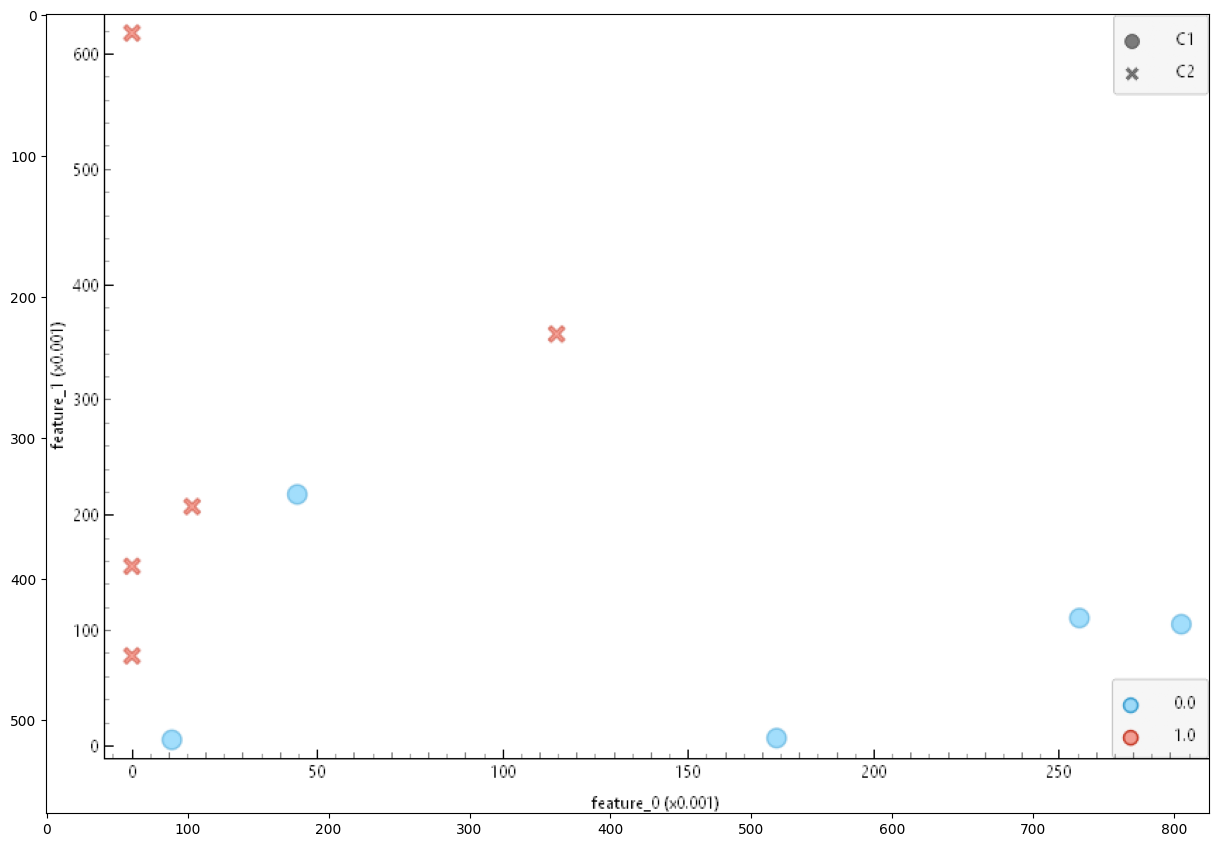

PCA + kmeans results:


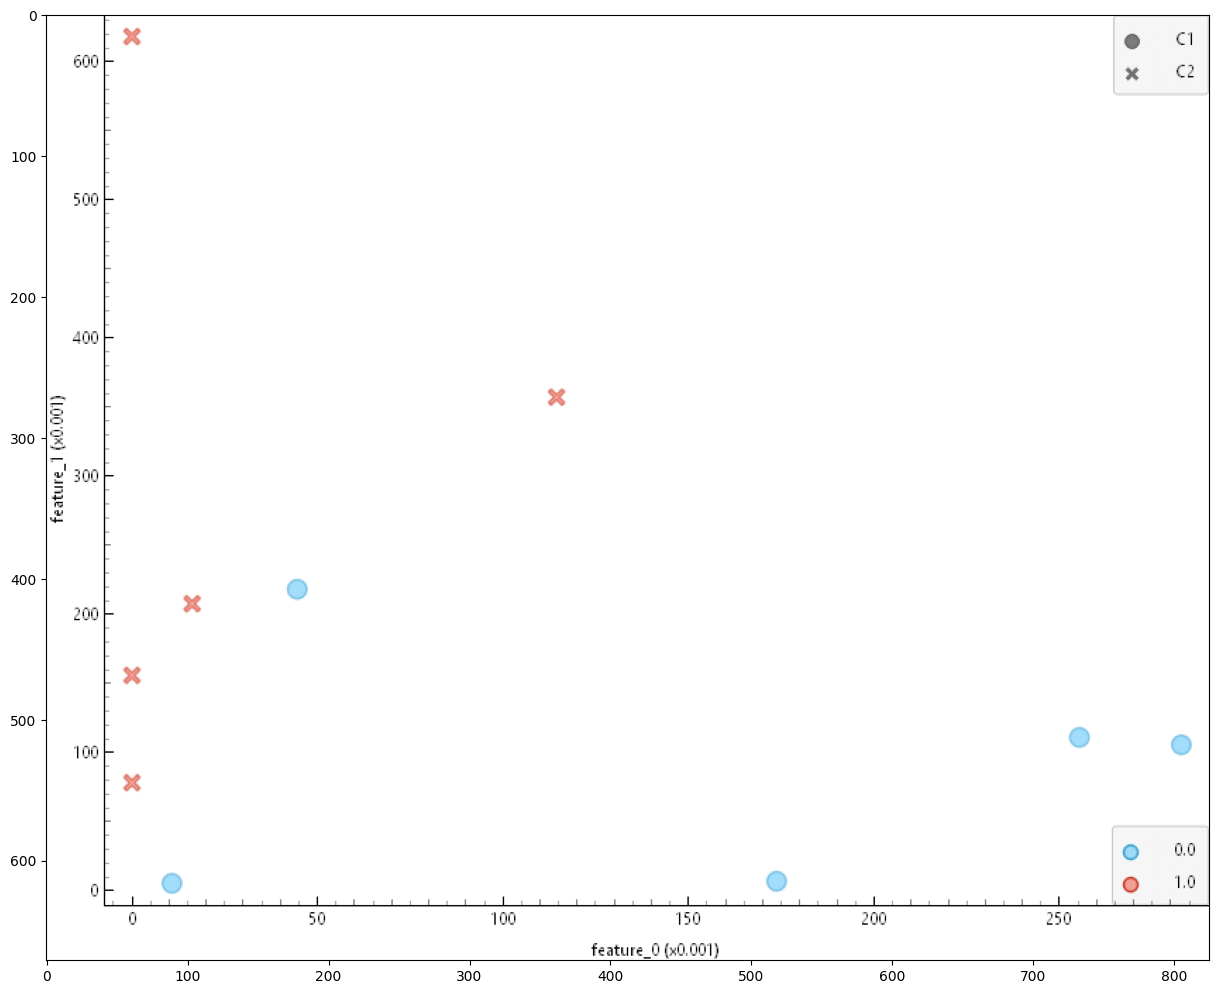

In [17]:
print("Orange workflow")
img = load_img("orangeworkflow.png")
img_array = img_to_array(img)/255.
plt.figure(figsize = (15,15))
plt.imshow(img_array)
plt.show()

print("t-SNE results:")
img = load_img("tsne.png")
img_array = img_to_array(img)/255.
plt.figure(figsize = (15,15))
plt.imshow(img_array)
plt.show()

print("Raw kmenas results:")
img = load_img("kmeans.png")
img_array = img_to_array(img)/255.
plt.figure(figsize = (15,15))
plt.imshow(img_array)
plt.show()

print("PCA + kmeans results:")
img = load_img("kmeanspca.png")
img_array = img_to_array(img)/255.
plt.figure(figsize = (15,15))
plt.imshow(img_array)
plt.show()

**TODO: Napisac krotkie wnioski:**

Sieci przetrenowane na zbiorze ImageNet skutecznie ekstrahują cechy, co pozwala na poprawne rozróżnianie nowych obrazów bez dodatkowego treningu. Wizualizacja t-SNE potwierdza, że w przestrzeni cech obrazy należące do tej samej klasy tworzą wyraźnie odseparowane skupiska.

## **Klasyfikacja**

Wczytac model bazowy (Xception lub InceptionV3) z parametrem include_top ustawionym na False (klasyfikator dla zbioru ImageNet jest "odcinany"). Ustawic odpowiedni rozmiar warstwy wejsciowej - (299, 299, 3), ustawic parametr weights na imagenet. Model nazwij base_model.

Hint (dla Xception):

https://keras.io/api/applications/xception/

inne modele (nie wszystkie modele sa bezposrednio dostepne w tensorflow.keras.applications):

https://keras.io/api/applications/

**Na potrzeby laboratorium prosze skorzytac z modeli Xception lun InceptionV3.**, oczywiscie mozna takze "pobawic" sie innymi, ale nie jest gwarantowana ich skutecznosc :)

In [18]:
from tensorflow.keras.applications import Xception

base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

Sprawic aby parametry modelu bazowego **nie byly trenowane** - sprawdz parametr trainable modelu

Hint:

https://keras.io/guides/transfer_learning/

In [19]:
base_model.trainable = False

Z wykorzystaniem modelu bazowego (np. Xception) stworzyc swoj model do klasyfikacji binarnej zdjec. Do stworzenia modelu wykorzystac nastepujace warstwy: Input, GlobalAveragePooling2D i Dense (w warstwie powinien sie znajdowac 1 neuron. Nalezy tu wykorzystac funkcje aktywacji sigmoid - wtedy na wyjsciu zostanie zwrocona liczba z zakresu 0, 1). Model koncowy nalezy stworzyc za pomoca funkcji Model, ktora jako argumenty przyjmuje warstwe wejsciowa i wyjsciowa. Ponizej przedstawiono wyglad modelu koncowego. Koncowy model nazwac new_model - aby mozliwe bylo korzystanie z dostarczonych pozniej komorek - swoj model takze wyswietlic.

Hint:

https://keras.io/guides/transfer_learning/

In [20]:
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Definicja wejścia
inputs = Input(shape=(299, 299, 3))

# Przekazanie przez model bazowy (training=False ważne dla BatchNormalization)
x = base_model(inputs, training=False)

# Warstwa pulingu (spłaszczająca)
x = GlobalAveragePooling2D()(x)

# Warstwa wyjściowa (1 neuron, sigmoid dla klasyfikacji binarnej)
outputs = Dense(1, activation='sigmoid')(x)

# Złożenie modelu
new_model = Model(inputs, outputs)
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 10, 10, 2048)        │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

Zbudowany model skompilować (funkcja compile, optymalizator: adam, funkcja straty: binary_crossentropy, metryka do sledzenia: accuracy) oraz przetrenowac (funkcja train, podajemy X i y jako argumenty, trening ma trwac 7 epok, ale mozna sprobowac takze inne liczby - nalezy obserwowac jak zmienia sie accuracy, w zbiorze znajduje sie tylko 10 probek, wiec liczba epok nie powinna byc zbyt duza - wtedy wystepuje szansa na przetrenowanie) - ponizej wynik

In [21]:
new_model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

history = new_model.fit(X, y, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6000 - loss: 0.7318 - val_accuracy: 0.5000 - val_loss: 0.6783
Epoch 2/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - accuracy: 0.6000 - loss: 0.6704 - val_accuracy: 0.5000 - val_loss: 0.6281
Epoch 3/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.7000 - loss: 0.6130 - val_accuracy: 0.7500 - val_loss: 0.5808
Epoch 4/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 0.8000 - loss: 0.5594 - val_accuracy: 0.7500 - val_loss: 0.5366
Epoch 5/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step - accuracy: 0.9000 - loss: 0.5098 - val_accuracy: 1.0000 - val_loss: 0.4954
Epoch 6/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 1.0000 - loss: 0.4642 - val_accuracy: 1.0000 - val_loss: 0.4571
Epoch 7/7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - accuracy: 1.0000 - loss: 0.4222 - val_accuracy: 1.0000 - val_loss: 0.4218


Predykcja za pomoca wytrenowanego modelu:

In [22]:
nn_pred_train = new_model.predict(X)
print("train raw:")
print(nn_pred_train)
nn_pred_train_binary = np.round(nn_pred_train)
print("train binary:")
print(nn_pred_train_binary)

nn_pred_test = new_model.predict(X_test)
print("test raw:")
print(nn_pred_test)
nn_pred_test_binary = np.round(nn_pred_test)
print("test binary:")
print(nn_pred_test_binary)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 792ms/step
train raw:
[[0.3309041 ]
 [0.39287713]
 [0.32596475]
 [0.31425786]
 [0.36671028]
 [0.7214879 ]
 [0.69742715]
 [0.6872706 ]
 [0.71711296]
 [0.7296281 ]]
train binary:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 565ms/step
test raw:
[[0.40962368]
 [0.3759934 ]
 [0.72257864]
 [0.6951039 ]]
test binary:
[[0.]
 [0.]
 [1.]
 [1.]]


Wyznaczenie dokladnosci (accuracy) dla zbioru treningowego i testowego:

In [23]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y, nn_pred_train_binary)
test_accuracy = accuracy_score(y_test, nn_pred_test_binary)

Graficzna prezentacja wynikow i wyswietlenie dokladnosci:

train
accuracy: 1.0


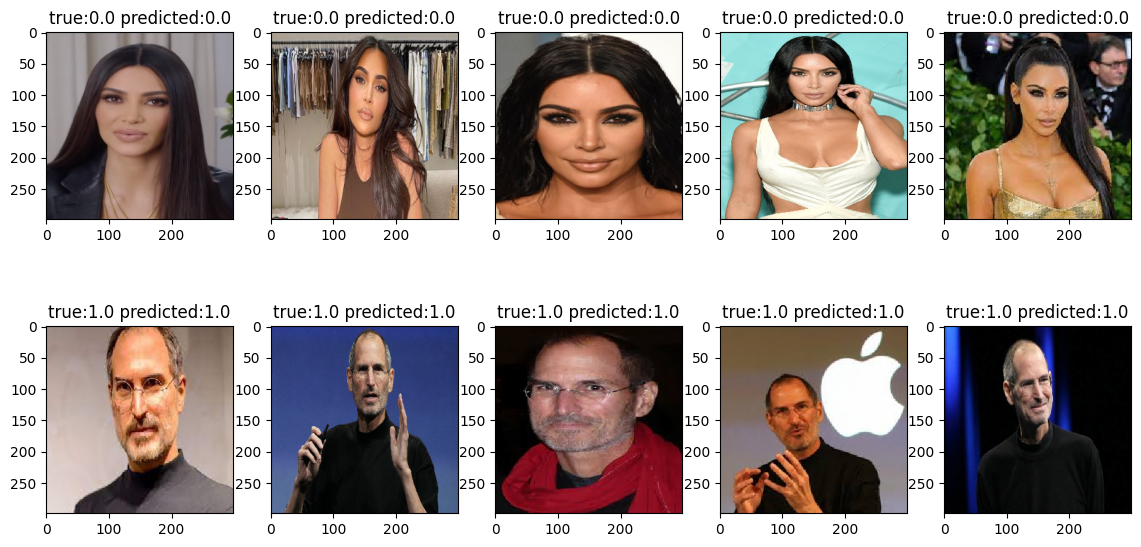

test
accuracy: 1.0


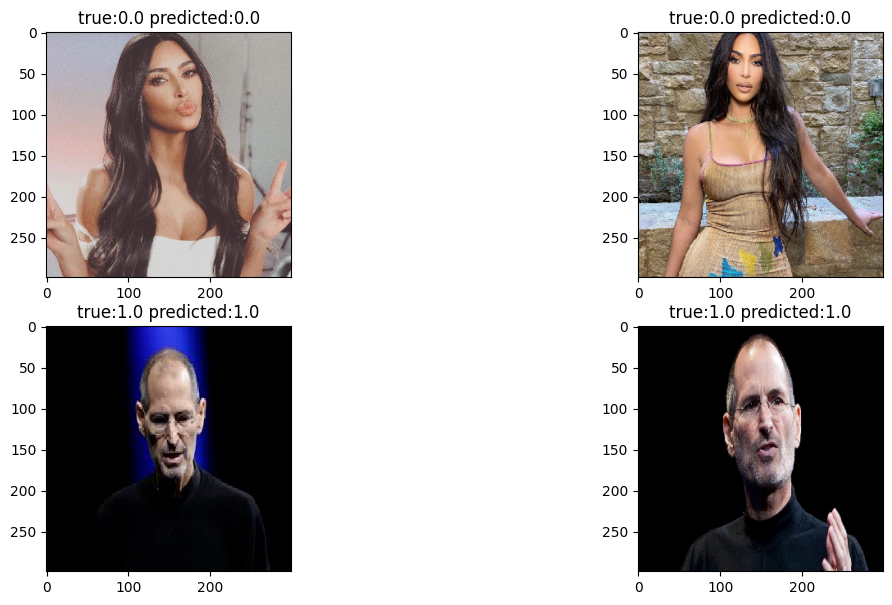

In [24]:
print("train")
print(f"accuracy: {train_accuracy}")
plot_images(X, y, rows=2, cols=5, clustering=False, nntesting=True, y_pred=nn_pred_train_binary.reshape(nn_pred_train_binary.shape[0]))
print("test")
print(f"accuracy: {test_accuracy}")
plot_images(X_test, y_test, rows=2, cols=2, clustering=False, nntesting=True, y_pred=nn_pred_test_binary.reshape(nn_pred_test_binary.shape[0]))